In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [2]:
data = pd.read_csv("/content/cleaned_vgames_data.csv")
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Other_Sales_Ratio,Score_Difference,Total_Score,Game_Age,Platform_Publisher,Score_Percentage_Difference,Normalized_Critic_Score,Normalized_User_Score,Sales_Critic_Score_Ratio,Sales_User_Score_Ratio
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,...,0.102387,-4.000000,77.600000,17,Wii_Nintendo,-5.263158,0.741176,0.824742,1.085921,1.031625
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,...,0.019135,-2.282783,69.880792,38,NES_Nintendo,-3.309931,0.658443,0.734541,0.583462,0.564768
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,...,0.092624,-1.000000,82.400000,15,Wii_Nintendo,-1.219512,0.811765,0.855670,0.433171,0.427952
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,...,0.090021,0.000000,80.000000,14,Wii_Nintendo,0.000000,0.788235,0.824742,0.409625,0.409625
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,...,0.031878,-2.282783,69.880792,27,GB_Nintendo,-3.309931,0.658443,0.734541,0.454851,0.440278


In [3]:
data.Global_Sales.describe()

count    16719.000000
mean         0.533543
std          1.547935
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.530000
Name: Global_Sales, dtype: float64

In [4]:
data['Successful'] = data['Global_Sales'] > 1
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Score_Difference,Total_Score,Game_Age,Platform_Publisher,Score_Percentage_Difference,Normalized_Critic_Score,Normalized_User_Score,Sales_Critic_Score_Ratio,Sales_User_Score_Ratio,Successful
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,...,-4.000000,77.600000,17,Wii_Nintendo,-5.263158,0.741176,0.824742,1.085921,1.031625,True
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,...,-2.282783,69.880792,38,NES_Nintendo,-3.309931,0.658443,0.734541,0.583462,0.564768,True
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,...,-1.000000,82.400000,15,Wii_Nintendo,-1.219512,0.811765,0.855670,0.433171,0.427952,True
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,...,0.000000,80.000000,14,Wii_Nintendo,0.000000,0.788235,0.824742,0.409625,0.409625,True
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,...,-2.282783,69.880792,27,GB_Nintendo,-3.309931,0.658443,0.734541,0.454851,0.440278,True


In [5]:
X = data.drop(['Name', 'Global_Sales', 'Successful'], axis=1)
y_regression = data['Global_Sales']
y_classification = data['Successful']

In [6]:
X = X.fillna(X.mean())


<ipython-input-6-b1ca852a1154>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X = X.fillna(X.mean())


In [7]:
print("Number of infinite values:", (X == float('inf')).sum().sum())


Number of infinite values: 1


In [8]:
X = X.replace([float('inf'), float('-inf')], pd.NA)
X = X.fillna(X.max())


### Performing Operations on Categorical Features

In [9]:
categorical_features = ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating', 'Platform_Publisher']
numerical_features = list(X.drop(categorical_features, axis=1).columns)

preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), numerical_features),
                  ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

X_processed = preprocessor.fit_transform(X)


### Splitting Data into Train and Test according to use case

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_regression_train, y_regression_test, y_classification_train, y_classification_test = train_test_split(X_processed, y_regression, y_classification, test_size=0.2, random_state=42)

## Model Building for Regression Task

In [11]:
# Regression Models

# Linear Regression
regression_model = LinearRegression()
regression_model.fit(X_train, y_regression_train)

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_regression_train)

# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_regression_train)

# Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train, y_regression_train)

# Random Forest Regression
rf_regression_model = RandomForestRegressor()
rf_regression_model.fit(X_train, y_regression_train)

RandomForestRegressor()

## Model Building for Classification Task

In [12]:
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

In [13]:
# Classification Models

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_classification_train)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_dense, y_classification_train)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_dense, y_classification_train)

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_classification_train)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_classification_train)


RandomForestClassifier()

## Evaluation Step of Both Regression and Classification Task

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, f1_score

def evaluate_classification_models(models, X_test_dense, y_test):

    for name, model in models.items():
        if name in ["GaussianNB", "K-Nearest Neighbors"]:
            y_pred = model.predict(X_test_dense)
        else:
            y_pred = model.predict(X_test)
        print(f"{name} -\t\t Accuracy: {accuracy_score(y_test, y_pred):.4f}, F1 Score: {f1_score(y_test, y_pred):.4f}")

        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
        
        plt.figure(figsize=(6, 6))
        disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
        plt.title(f"Confusion Matrix - {name}")
        plt.show()

def evaluate_regression_models(models, X_test, y_test):


    for name, model in models.items():
        y_pred = model.predict(X_test)
        print(f"{name} - MSE: {mean_squared_error(y_test, y_pred):.4f}")
        residuals = y_test - y_pred

        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
        # Residual plot
        sns.scatterplot(x=y_pred, y=residuals, ax=axes[0])
        axes[0].axhline(y=0, color='r', linestyle='--')
        axes[0].set_xlabel('Predicted Values')
        axes[0].set_ylabel('Residuals')
        axes[0].set_title(f'Residual Plot - {name}')
        
        # Scatter plot of actual vs predicted values
        sns.scatterplot(x=y_test, y=y_pred, ax=axes[1])
        axes[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
        axes[1].set_xlabel('Actual Values')
        axes[1].set_ylabel('Predicted Values')
        axes[1].set_title(f'Scatter Plot - {name}')
        
        plt.tight_layout()
        plt.show()




In [31]:
classification_models = {
    "Logistic Regression":logistic_model,
    "GaussianNB": nb_model,
    "K-Nearest Neighbors": knn_model,
    "Support Vector Machine": svm_model,
    "Random Forest": rf_model
}

regression_models = {
    "Linear Regression": regression_model,
    "Ridge Regression": ridge_model,
    "Lasso Regression": lasso_model,
    "Support Vector Regression": svr_model,
    "Random Forest Regression": rf_regression_model
}

In [ ]:
# Evaluation for classification Model
evaluate_classification_models(classification_models, X_test_dense, y_classification_test)

Linear Regression - MSE: 0.0000


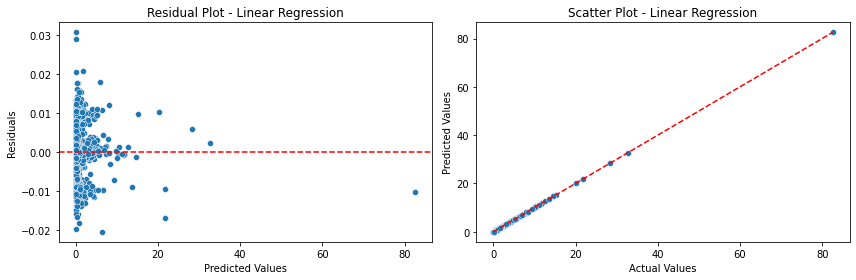

Ridge Regression - MSE: 0.0000


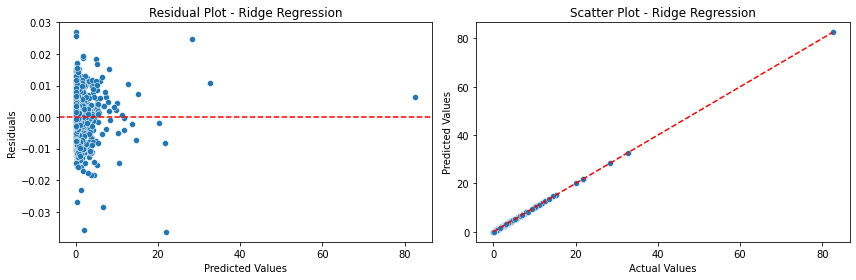

Lasso Regression - MSE: 2.6606


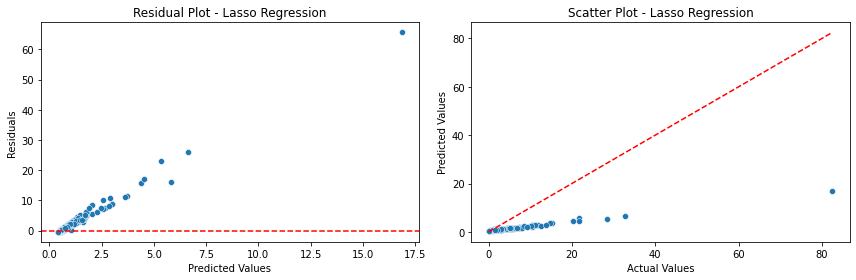

Support Vector Regression - MSE: 2.8215


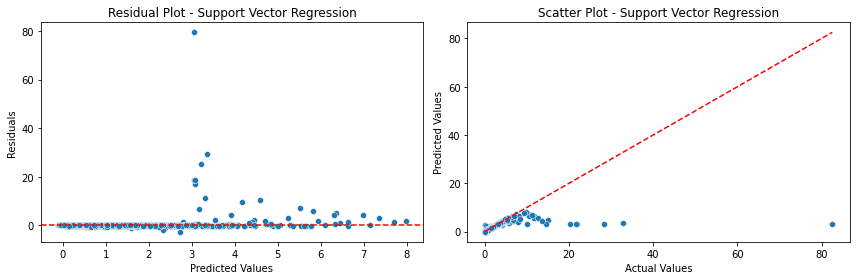

Random Forest Regression - MSE: 0.6892


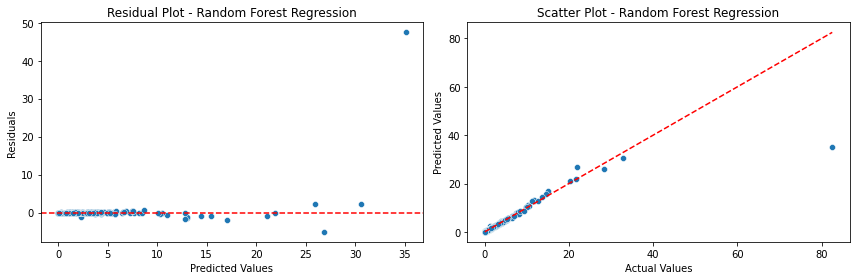

In [45]:
# Evaluation for Regression Model
evaluate_regression_models(regression_models, X_test, y_regression_test)

## Classification Task by Neural Network

In [18]:
X_train_nn, X_val_nn, y_classification_train_nn, y_classification_val_nn = train_test_split(X_train_dense, y_classification_train, test_size=0.2, random_state=42)

In [19]:
# Classification Neural Network
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_nn.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train_nn, y_classification_train_nn, epochs=20, batch_size=32, validation_data=(X_val_nn, y_classification_val_nn))



Epoch 1/20
335/335 [==============================] - 7s 6ms/step - loss: 0.1013 - accuracy: 0.9640 - val_loss: 0.0226 - val_accuracy: 0.9925
Epoch 2/20
335/335 [==============================] - 1s 4ms/step - loss: 0.0294 - accuracy: 0.9902 - val_loss: 0.0194 - val_accuracy: 0.9914
Epoch 3/20
335/335 [==============================] - 1s 4ms/step - loss: 0.0202 - accuracy: 0.9935 - val_loss: 0.0189 - val_accuracy: 0.9918
Epoch 4/20
335/335 [==============================] - 2s 5ms/step - loss: 0.0187 - accuracy: 0.9948 - val_loss: 0.0145 - val_accuracy: 0.9940
Epoch 5/20
335/335 [==============================] - 3s 8ms/step - loss: 0.0116 - accuracy: 0.9975 - val_loss: 0.0175 - val_accuracy: 0.9951
Epoch 6/20
335/335 [==============================] - 2s 6ms/step - loss: 0.0184 - accuracy: 0.9964 - val_loss: 0.0212 - val_accuracy: 0.9903
Epoch 7/20
335/335 [==============================] - 1s 4ms/step - loss: 0.0131 - accuracy: 0.9966 - val_loss: 0.0193 - val_accuracy: 0.9929
Epoch 

105/105 [==============================] - 0s 2ms/step
Neural Network - Accuracy: 0.9928, F1 Score: 0.9695


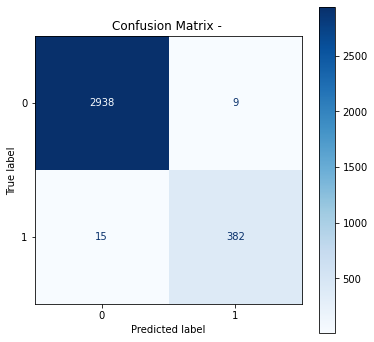

In [38]:
#Accuracy for classification Task by Neural Network

y_pred_proba = nn_model.predict(X_test_dense)
y_pred = (y_pred_proba > 0.5).astype(int).reshape(-1)
print(f"Neural Network - Accuracy: {accuracy_score(y_classification_test, y_pred):.4f}, F1 Score: {f1_score(y_classification_test, y_pred):.4f}")



cm = confusion_matrix(y_classification_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
        
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title(f"Confusion Matrix - ")
plt.show()


## Regression Task by Neural Network


In [21]:
# Splitting Data for regression Task

X_train_nn_regression, X_val_nn_regression, y_regression_train_nn, y_regression_val_nn = train_test_split(X_train_dense, y_regression_train, test_size=0.2, random_state=42)

In [22]:
# Regression Neural Network
nn_regression_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_nn_regression.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1)
])

nn_regression_model.compile(optimizer='adam', loss='mean_squared_error')
nn_regression_model.fit(X_train_nn_regression, y_regression_train_nn, epochs=20, batch_size=32, validation_data=(X_val_nn_regression, y_regression_val_nn))


Epoch 1/20
335/335 [==============================] - 4s 5ms/step - loss: 0.5119 - val_loss: 0.0788
Epoch 2/20
335/335 [==============================] - 2s 5ms/step - loss: 0.1915 - val_loss: 0.1089
Epoch 3/20
335/335 [==============================] - 2s 6ms/step - loss: 0.2261 - val_loss: 0.0804
Epoch 4/20
335/335 [==============================] - 2s 5ms/step - loss: 0.1897 - val_loss: 0.0568
Epoch 5/20
335/335 [==============================] - 1s 4ms/step - loss: 0.2720 - val_loss: 0.3214
Epoch 6/20
335/335 [==============================] - 3s 8ms/step - loss: 0.2302 - val_loss: 0.0596
Epoch 7/20
335/335 [==============================] - 2s 6ms/step - loss: 0.2179 - val_loss: 0.0803
Epoch 8/20
335/335 [==============================] - 2s 5ms/step - loss: 0.2089 - val_loss: 0.0788
Epoch 9/20
335/335 [==============================] - 2s 5ms/step - loss: 0.1803 - val_loss: 0.0408
Epoch 10/20
335/335 [==============================] - 1s 4ms/step - loss: 0.1624 - val_loss: 0.0566

In [42]:
y_pred = nn_regression_model.predict(X_test)
print(f"Neural Network - MSE: {mean_squared_error(y_regression_test, y_pred):.4f}")

105/105 [==============================] - 0s 3ms/step
Neural Network - MSE: 0.1747
